In [24]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [25]:
df = pd.read_csv('./subscribers.csv')
df.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [26]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [27]:
df = df[(df['age']<150)&(df['age']>0)]
df.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
5,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,UAE,bing,tv,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 20:15:43,2020-03-17 20:15:43,False,0.3303,ar,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaN,True


In [28]:
df['account_creation_date'] = pd.to_datetime(df['account_creation_date'])
df['trial_end_date'] = pd.to_datetime(df['trial_end_date'])
df['last_payment'] = pd.to_datetime(df['last_payment'])
df['next_payment'] = pd.to_datetime(df['next_payment'])
df['cancel_date'] = pd.to_datetime(df['cancel_date'])

In [29]:
df.shape

(191522, 30)

In [30]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191522 entries, 1 to 227627
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         191522 non-null  int64         
 1   package_type                  156172 non-null  object        
 2   num_weekly_services_utilized  116738 non-null  float64       
 3   preferred_genre               155426 non-null  object        
 4   intended_use                  188021 non-null  object        
 5   weekly_consumption_hour       188767 non-null  float64       
 6   num_ideal_streaming_services  115022 non-null  float64       
 7   age                           191522 non-null  float64       
 8   male_TF                       191518 non-null  object        
 9   country                       191522 non-null  object        
 10  attribution_technical         191522 non-null  object        
 11  attribution_s

In [31]:
print("subid:", len(df['subid'].unique()))
#no duplicate users

subid: 191522


In [32]:
df_new = df.drop(['country','attribution_survey','months_per_bill_period','language','plan_type'],axis=1)
df_new.shape

(191522, 25)

In [33]:
df_new.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,facebook,NaN,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaT,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,iOS,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,NaN,14,False,0,NaT,NaT,NaT,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,search,Android,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,NaN,14,False,0,NaT,NaT,NaT,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,iOS,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaT,True
5,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,bing,NaN,4.7343,4.5141,2020-03-03 20:15:43,2020-03-17 20:15:43,False,0.3303,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaT,True


In [34]:
df_package_type = pd.get_dummies(df_new['package_type'])
df_new= pd.concat([df_new, df_package_type], axis=1)
del df_new["package_type"]
df_new.head()

df_preferred_genre = pd.get_dummies(df_new['preferred_genre'])
df_new= pd.concat([df_new, df_preferred_genre], axis=1)
del df_new["preferred_genre"]
df_new.head()

df_intended_use = pd.get_dummies(df_new['intended_use'])
df_new= pd.concat([df_new, df_intended_use], axis=1)
del df_new["intended_use"]
df_new.head()

df_attribution_technical = pd.get_dummies(df_new['attribution_technical'])
df_new= pd.concat([df_new, df_attribution_technical], axis=1)
del df_new["attribution_technical"]
df_new.head()

df_op_sys = pd.get_dummies(df_new['op_sys'])
df_new= pd.concat([df_new, df_op_sys], axis=1)
del df_new["op_sys"]
df_new.head()

df_payment_type = pd.get_dummies(df_new['payment_type'])
df_new= pd.concat([df_new, df_payment_type], axis=1)
del df_new["payment_type"]
df_new.head()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,base,economy,enhanced,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,affiliate,appstore,bing,bing_organic,brand sem intent bing,brand sem intent google,content_greatist,criteo,direct_mail,discovery,display,email,email_blast,facebook,facebook_organic,google_organic,influencer,internal,organic,other,ott,pinterest,pinterest_organic,playstore,podcast,quora,referral,samsung,search,tv,twitter,vod,youtube,Android,iOS,Apple Pay,CBD,Najim,Paypal,RAKBANK,Standard Charter
1,23383224,NaN,22.951579,NaN,70.0,False,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaT,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26844789,3.0,36.001186,2.0,25.0,True,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,14,False,0,NaT,NaT,NaT,True,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,29417030,NaN,20.051667,NaN,30.0,False,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,14,False,0,NaT,NaT,NaT,True,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,26723159,4.0,22.951579,3.0,28.0,False,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaT,True,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,24810928,NaN,20.051667,NaN,70.0,False,4.7343,4.5141,2020-03-03 20:15:43,2020-03-17 20:15:43,False,0.3303,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaT,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [35]:
df_new.fillna(0, inplace=True)
df_new.head()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,base,economy,enhanced,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,affiliate,appstore,bing,bing_organic,brand sem intent bing,brand sem intent google,content_greatist,criteo,direct_mail,discovery,display,email,email_blast,facebook,facebook_organic,google_organic,influencer,internal,organic,other,ott,pinterest,pinterest_organic,playstore,podcast,quora,referral,samsung,search,tv,twitter,vod,youtube,Android,iOS,Apple Pay,CBD,Najim,Paypal,RAKBANK,Standard Charter
1,23383224,0.0,22.951579,0.0,70.0,False,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,0,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26844789,3.0,36.001186,2.0,25.0,True,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,14,False,0,0,0,0,True,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,29417030,0.0,20.051667,0.0,30.0,False,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,14,False,0,0,0,0,True,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,26723159,4.0,22.951579,3.0,28.0,False,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,0,True,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,24810928,0.0,20.051667,0.0,70.0,False,4.7343,4.5141,2020-03-03 20:15:43,2020-03-17 20:15:43,False,0.3303,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,0,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
df_new.drop_duplicates(subset=['subid'], inplace=True)
df_new.shape

(191522, 75)

In [37]:
df_new.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,monthly_price,discount_price,join_fee,num_trial_days,payment_period,base,economy,enhanced,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,affiliate,appstore,bing,bing_organic,brand sem intent bing,brand sem intent google,content_greatist,criteo,direct_mail,discovery,display,email,email_blast,facebook,facebook_organic,google_organic,influencer,internal,organic,other,ott,pinterest,pinterest_organic,playstore,podcast,quora,referral,samsung,search,tv,twitter,vod,youtube,Android,iOS,Apple Pay,CBD,Najim,Paypal,RAKBANK,Standard Charter
count,1.915220e+05,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.00000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000,191522.000000
mean,2.498648e+07,1.834035,27.597989,1.237936,46.181778,4.731644,4.511846,0.115287,13.987646,0.765687,0.453556,0.083212,0.278657,0.507722,0.208503,0.031641,0.019721,0.043943,0.364026,0.026650,0.067475,0.072775,0.035745,0.293768,0.121281,0.048658,0.000230,0.005916,0.001916,0.011351,0.082591,0.000026,0.000230,0.000721,0.013184,0.007268,0.110191,0.032999,0.327837,0.015549,0.049874,0.000110,0.005790,0.097561,0.009273,0.00082,0.029412,0.000157,0.000063,0.004835,0.000522,0.020901,0.000444,0.115261,0.000021,0.000026,0.001535,0.004731,0.324589,0.607586,0.000021,0.021883,0.011038,0.093488,0.053122,0.116404
std,2.883797e+06,1.601724,5.961044,1.027408,13.977997,0.109838,0.105530,0.177011,0.415692,0.784125,0.497840,0.276204,0.448340,0.499942,0.406240,0.175044,0.139040,0.204968,0.481157,0.161058,0.250844,0.259767,0.185655,0.455488,0.326455,0.215152,0.015155,0.076686,0.043733,0.105936,0.275264,0.005109,0.015155,0.026833,0.114062,0.084943,0.313128,0.178634,0.469426,0.123723,0.217686,0.010471,0.075875,0.296720,0.095850,0.02862,0.168958,0.012515,0.007915,0.069366,0.022844,0.143053,0.021062,0.319337,0.004570,0.005109,0.039150,0.068616,0.468222,0.488289,0.004570,0.146301,0.104480,0.291116,0.224277,0.320710
min,2.000001e+07,0.000000,-32.146760,-1.000000,10.000000,0.807400,0.770700,-0.660600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.249021e+07,0.000000,24.401536,0.000000,35.000000,4.734300,4.514100,0.036700,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [38]:
df_kmeans = df_new.copy()
df_kmeans = df_kmeans.drop(['subid','account_creation_date','trial_end_date','last_payment','next_payment','cancel_date'],axis=1)
df_kmeans.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,initial_credit_card_declined,join_fee,num_trial_days,current_sub_TF,payment_period,trial_completed,base,economy,enhanced,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,affiliate,appstore,bing,bing_organic,brand sem intent bing,brand sem intent google,content_greatist,criteo,direct_mail,discovery,display,email,email_blast,facebook,facebook_organic,google_organic,influencer,internal,organic,other,ott,pinterest,pinterest_organic,playstore,podcast,quora,referral,samsung,search,tv,twitter,vod,youtube,Android,iOS,Apple Pay,CBD,Najim,Paypal,RAKBANK,Standard Charter
1,0.0,22.951579,0.0,70.0,False,4.7343,4.5141,False,0.3303,14,True,1,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,36.001186,2.0,25.0,True,4.7343,4.5141,False,0.1101,14,False,0,True,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.0,20.051667,0.0,30.0,False,4.7343,4.5141,False,0.0367,14,False,0,True,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,4.0,22.951579,3.0,28.0,False,4.7343,4.5141,False,0.0367,14,True,2,True,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0.0,20.051667,0.0,70.0,False,4.7343,4.5141,False,0.3303,14,True,1,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [39]:
#df_kmeans = (df_kmeans - df_kmeans.mean(axis = 0))/(df_kmeans.std(axis = 0))
#df_kmeans['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','age','monthly_price','discount_price','monthly_price','discount_price','join_fee','num_trial_days'] = (data['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','age','monthly_price','discount_price','monthly_price','discount_price','join_fee','num_trial_days'] - data['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','age','monthly_price','discount_price','monthly_price','discount_price','join_fee','num_trial_days'].mean(axis = 0))/(data['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','age','monthly_price','discount_price','monthly_price','discount_price','join_fee','num_trial_days'].std(axis = 0))
#df_kmeans.columns=['Z'+i for i in df_kmeans.columns]
#df_kmeans.head()

In [40]:
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-',color="r")
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

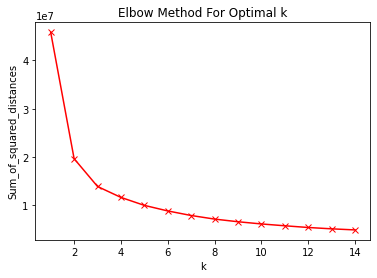

In [41]:
fitting(df_kmeans)

In [42]:
kmean=KMeans(n_clusters=3).fit(df_kmeans)
x = pd.DataFrame(kmean.cluster_centers_)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,1.955603,27.867922,1.310543,46.963884,0.128905,4.731445,4.511696,0.058573,0.115506,13.986647,0.542914,0.763043,0.870350,0.447875,0.079073,0.278362,0.503430,0.198283,0.030887,0.019219,0.049937,0.349674,0.029580,0.072723,0.075153,0.033748,0.293570,0.128265,0.046853,0.000248,0.005004,0.001868,0.009799,0.085397,3.919673e-05,0.000196,0.000915,0.012752,0.007003,0.112024,0.036688,0.347139,0.015078,0.049819,0.000013,0.006624,0.092883,0.010335,0.000510,0.024511,0.000105,0.000052,0.002456,0.000379,0.021414,0.000444,0.104956,2.613115e-05,0.000026,0.001359,0.003083,0.328116,0.619975,1.306558e-05,0.024380,0.010348,0.105936,0.055607,0.112795
1,1.651234,26.956291,1.104234,63.564683,0.134291,4.733178,4.513280,0.040252,0.150634,13.993692,0.411471,0.542213,0.827410,0.505304,0.125092,0.185901,0.456529,0.273294,0.042805,0.020745,0.017347,0.411790,0.024594,0.058106,0.081498,0.057486,0.244945,0.101267,0.041866,0.000131,0.010701,0.003248,0.023036,0.099014,-3.344086e-18,0.000469,0.000544,0.018737,0.012147,0.112250,0.030846,0.367577,0.011208,0.029757,0.000056,0.003905,0.101755,0.006909,0.000488,0.026528,0.000113,0.000019,0.000563,0.000695,0.016296,0.000188,0.075791,3.754811e-05,0.000038,0.001408,0.003680,0.316080,0.563991,-2.554651e-18,0.028968,0.014888,0.101924,0.068262,0.134685
2,1.841040,27.817047,1.263286,30.210288,0.125794,4.730567,4.510795,0.072667,0.084509,13.983668,0.680023,0.961828,0.915651,0.415943,0.052203,0.359073,0.557226,0.165262,0.022942,0.019459,0.059462,0.340603,0.024789,0.069054,0.062297,0.019459,0.336147,0.129893,0.056756,0.000292,0.002916,0.000826,0.003192,0.064938,3.240441e-05,0.000065,0.000632,0.008927,0.003386,0.106141,0.030282,0.269605,0.019880,0.067304,0.000275,0.006384,0.099741,0.009997,0.001491,0.037978,0.000259,0.000113,0.011471,0.000551,0.024238,0.000664,0.162103,-2.900241e-18,0.000016,0.001863,0.007680,0.327560,0.629844,4.860661e-05,0.012670,0.008571,0.070771,0.036973,0.105104


In [43]:
x.to_csv('T2re.csv')

In [49]:
res0Series = pd.Series(kmean.labels_)
res0 = res0Series[res0Series.values == 1]
print("类别为1的数据\n",(df.iloc[res0.index]))

类别为1的数据
            subid package_type  num_weekly_services_utilized preferred_genre  \
1       23383224         base                           NaN          comedy   
5       24810928         base                           NaN          comedy   
6       29726122         base                           2.0          comedy   
8       24930568         base                           NaN          comedy   
9       23452753      economy                           3.0           drama   
...          ...          ...                           ...             ...   
227588  25749000      economy                           3.0           drama   
227590  29324294         base                           NaN           other   
227607  26509361     enhanced                           3.0          comedy   
227618  22218943      economy                           NaN          comedy   
227621  25549852     enhanced                           NaN          comedy   

                       intended_use  weekl

In [51]:
res0Series = pd.Series(kmean.labels_)
res0 = res0Series[res0Series.values == 2]
print("类别为2的数据\n",(df.iloc[res0.index]))

类别为2的数据
            subid package_type  num_weekly_services_utilized preferred_genre  \
2       26844789     enhanced                           3.0        regional   
3       29417030         base                           NaN           drama   
4       26723159         base                           4.0          comedy   
7       20299962         base                           3.0           drama   
11      21361112     enhanced                           NaN          comedy   
...          ...          ...                           ...             ...   
227604  24614848         base                           3.0        regional   
227606  25927672          NaN                           3.0             NaN   
227615  22117405         base                           NaN          comedy   
227619  25492551         base                           3.0          comedy   
227623  21434712     enhanced                           3.0          comedy   

                       intended_use  weekl

In [53]:
res0Series = pd.Series(kmean.labels_)
res0 = res0Series[res0Series.values == 0]
print("类别为0的数据\n",(df.iloc[res0.index]))

类别为0的数据
            subid package_type  num_weekly_services_utilized preferred_genre  \
10      21191741          NaN                           NaN             NaN   
13      23163827      economy                           3.0          comedy   
14      26308559          NaN                           NaN             NaN   
18      29090912         base                           NaN           drama   
22      28863903         base                           2.0           drama   
...          ...          ...                           ...             ...   
227616  26828621         base                           4.0           drama   
227622  25835684         base                           2.0           drama   
227624  25843074     enhanced                           2.0          comedy   
227625  24799085         base                           NaN          comedy   
227627  20166335         base                           NaN          comedy   

                       intended_use  weekl

In [54]:
df_new.head()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,base,economy,enhanced,comedy,drama,international,other,regional,access to exclusive content,education,expand international access,expand regional access,other,replace OTT,supplement OTT,affiliate,appstore,bing,bing_organic,brand sem intent bing,brand sem intent google,content_greatist,criteo,direct_mail,discovery,display,email,email_blast,facebook,facebook_organic,google_organic,influencer,internal,organic,other,ott,pinterest,pinterest_organic,playstore,podcast,quora,referral,samsung,search,tv,twitter,vod,youtube,Android,iOS,Apple Pay,CBD,Najim,Paypal,RAKBANK,Standard Charter
1,23383224,0.0,22.951579,0.0,70.0,False,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,0,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26844789,3.0,36.001186,2.0,25.0,True,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,14,False,0,0,0,0,True,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,29417030,0.0,20.051667,0.0,30.0,False,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,14,False,0,0,0,0,True,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,26723159,4.0,22.951579,3.0,28.0,False,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,0,True,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,24810928,0.0,20.051667,0.0,70.0,False,4.7343,4.5141,2020-03-03 20:15:43,2020-03-17 20:15:43,False,0.3303,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,0,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [56]:
df_save = df_new.drop(['account_creation_date','trial_end_date','last_payment','next_payment','cancel_date'],axis=1)

In [57]:
df_save.to_csv('save.csv')